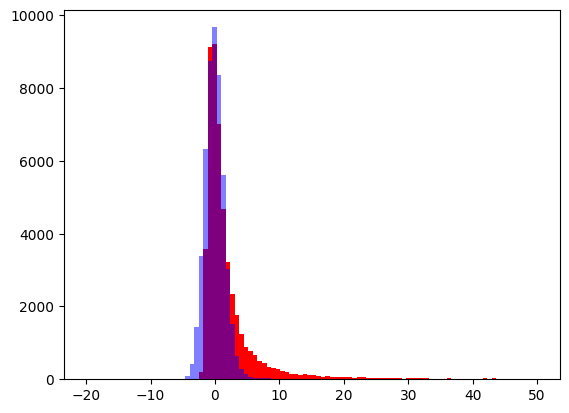

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable

generator = np.random.Generator(np.random.PCG64(seed=123))
a = levy_stable(alpha=1, beta=1.0, loc=0.0, scale=1.0).rvs(size=50000, random_state=generator)
b = levy_stable(alpha=1.9, beta=1.0, loc=0.0, scale=1.0).rvs(size=50000, random_state=generator)
fig, axs = plt.subplots(1)
axs.hist(a, bins = 100, color = 'r', range=(-20,50))
axs.hist(b, bins = 100, color = 'b', alpha = 0.5, range=(-20,50))
# fig.savefig('histogram.png')
plt.show()

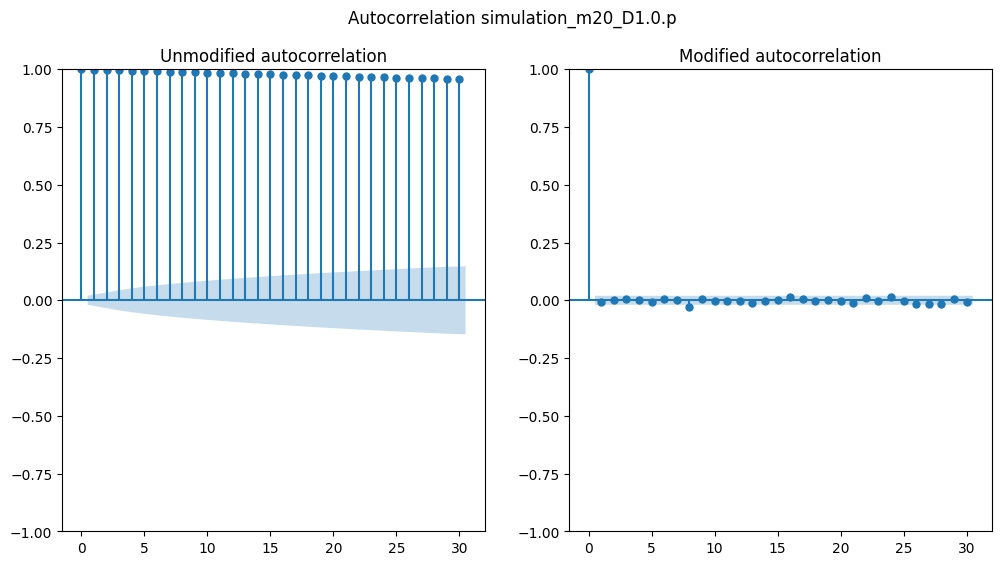

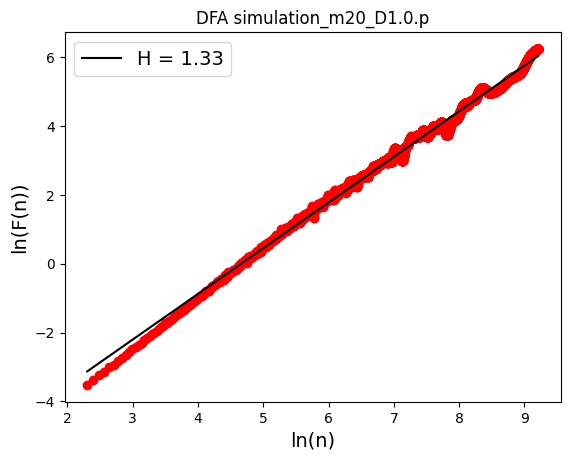

In [1]:
import pickle
import numpy as np
from monostable_model import calculate_autocorrelation_acf, calculate_autocorrelation_dfa
import matplotlib.pyplot as plt
file_path = 'data/'
file_name = 'simulation_m20_D1.0.p'
current = pickle.load(open(file_path+file_name, 'rb'))['x'][:10000]
calculate_autocorrelation_acf(current, title=file_name)
# fig.savefig('outputs/autocorrelation_acf_simulation_m20_D1.0.png')
calculate_autocorrelation_dfa(current, title=file_name)

178
179
True
0.044901089957896545


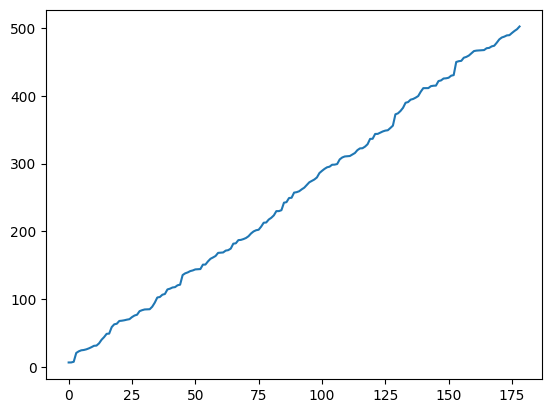

In [2]:
# plt.plot(current['x'][:50000])
plt.plot(current['dwell times'])
print(len(np.diff(current['dwell times'])))
print(len(current['dwell times']))
print(current['dwell times'][2] - current['dwell times'][1] == np.diff(current['dwell times'])[1])
print(current['dwell times'][1] - current['dwell times'][0])
plt.show()

NameError: name 'current' is not defined

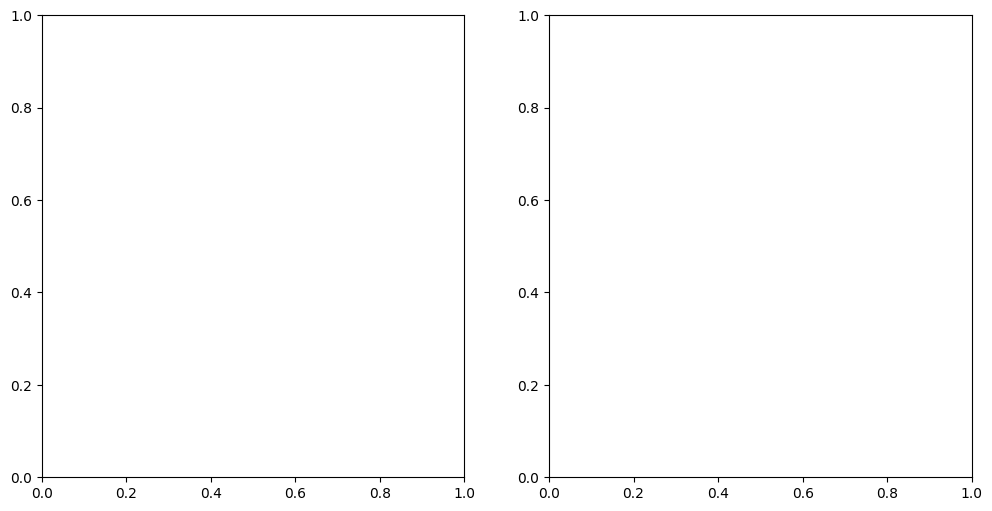

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from monostable_model import calculate_autocorrelation_acf, calculate_autocorrelation_dfa
data = np.random.normal(0, 1, 100000)
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
calculate_autocorrelation_acf(current['x'], fig, axs, title='Random noise')
calculate_autocorrelation_dfa(data, title='Random noise')

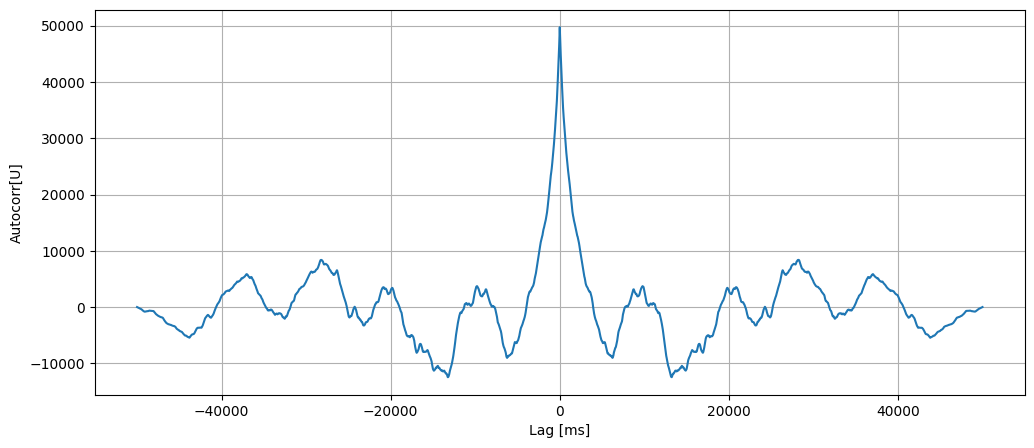

In [3]:
import pickle
import numpy as np
from monostable_model import calculate_autocorelation_acf, calculate_autocorelation_dfa
import matplotlib.pyplot as plt

def autocorr(x):
    return np.correlate(x, x, mode='full')

file_path = 'data/'
file_name = 'simulation_m20_D1.0.p'
current = pickle.load(open(file_path+file_name, 'rb'))

fig, ax = plt.subplots(figsize=(12., 5.))
U_autocorr = autocorr(current['x'][:50000])
lags = np.arange(len(U_autocorr)) - len(U_autocorr) / 2
ax.plot(lags, U_autocorr)
ax.set_xlabel("Lag [ms]")
ax.set_ylabel("Autocorr[U]")
ax.grid()

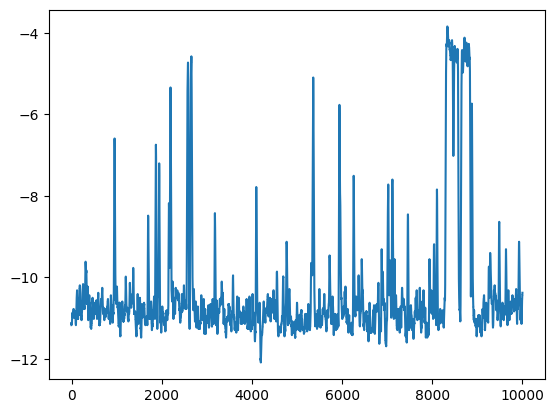

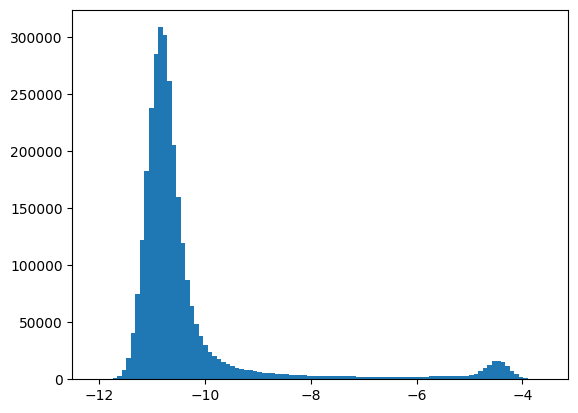

In [12]:
import matplotlib.pyplot as plt
cnt = 0
sum = 0
file_data = []
batch_size = 1
file_path = "data/hip16.txt"
with open(file_path) as data_file:
    for record in data_file:
        if cnt < batch_size:
            record = record.strip()
            sum += float(record)
            cnt += 1
        else:
            cnt = 0
            file_data.append(sum / batch_size)
            sum = 0
start = 10000
end = 20000
plt.plot(file_data[start:end])
plt.show()
plt.hist(file_data, bins=100)
plt.show()

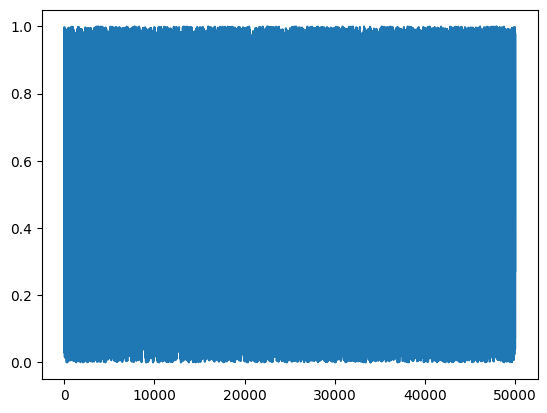

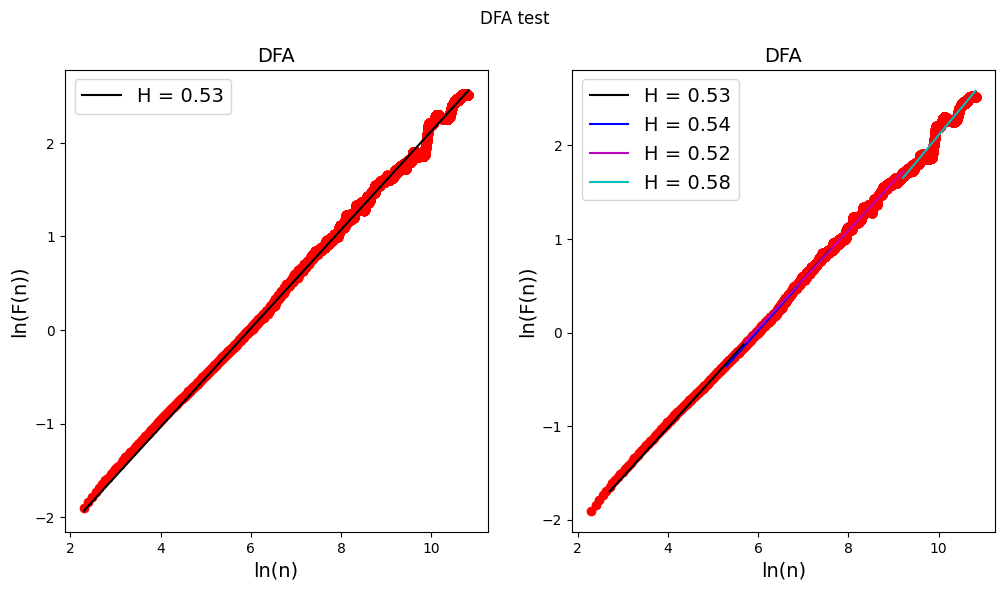

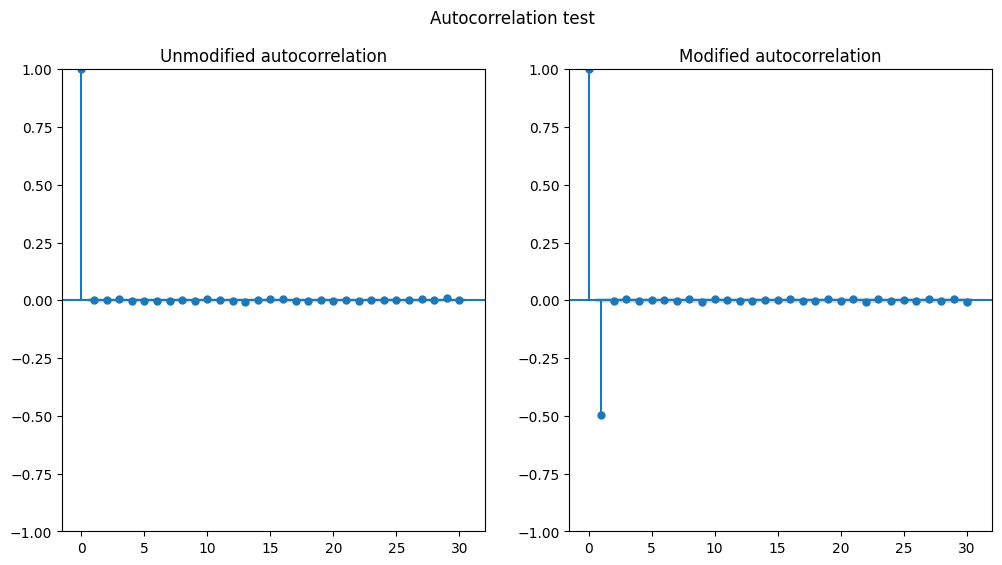

In [2]:
import hurst
import numpy as np
from monostable_model import calculate_autocorrelation_acf, calculate_autocorrelation_dfa
import matplotlib.pyplot as plt
a = np.random.random(50000)
plt.plot(a)
calculate_autocorrelation_dfa(a)
calculate_autocorrelation_acf(a)

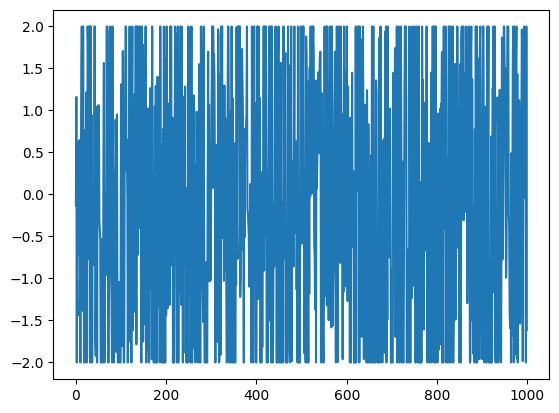

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
data = np.random.randn(1000) * 2  # Some generated data

# Define limits
lower_limit = -2
upper_limit = 2

# Clip values
clipped_data = np.clip(data, lower_limit, upper_limit)
plt.plot(clipped_data)

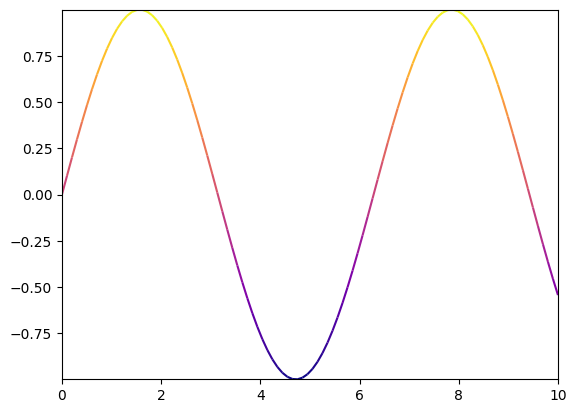

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)
colors = y  # Color by y-values

# Create segments
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create LineCollection
lc = LineCollection(segments, cmap='plasma', norm=plt.Normalize(colors.min(), colors.max()))
lc.set_array(colors)

# Plot
fig, ax = plt.subplots()
ax.add_collection(lc)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

# Add colorbar

# plt.colorbar(lc, ax=ax, label="Value")

plt.show()


In [12]:
import numpy as np
import matplotlib.pyplot as plt

class TestFunctions:

    def __init__(self, a, b1, b2, L, k, opened_larger, opened_state):
        self.__a = a
        self.__k = k
        self.__L = L
        self.__opened_larger = opened_larger
        self.__opened_state = opened_state
        self.__b1 = b1
        self.__b2 = b2
    def model_force_square(self, x, b):
        """Function calculates force value using square function.

        Parameters
        ---------
        x : float 
            Position value.
        b : float 
            Coefficient.

        Returns
        -------
        float: 
            Force value at x.
        """
        return -self.__a*(x - b)
    
    def __u(self, x, b):
        return (x - b) / self.__L
    
    def model_force_asymetrical(self, x, b):

        if self.__opened_larger:
            k = -self.__k if self.__opened_state else self.__k
        else:
            k = self.__k if self.__opened_state else -self.__k
        u_x = self.__u(x, b)
        return -(self.__a*self.__L) * (u_x + k * (u_x) ** 2 + (k ** 2 * (u_x) ** 3) / 2 - (k * u_x **4) / 3)

    def model_force_e(self, x, b):
        if self.__opened_larger:
            k = -self.__k if self.__opened_state else self.__k
        else:
            k = self.__k if self.__opened_state else -self.__k
        return self.model_force_square(x, b) * np.e ** (k * np.tanh((x - b) / self.__L))
    
    def model_force_a(self, x, b):
        if self.__opened_larger:
            k = self.__k if self.__opened_state else -self.__k
        else:
            k = -self.__k if self.__opened_state else self.__k
        return self.model_force_square(x, b) * np.e**(k*(x-b))
        
    def model_force_piecewise(self, x, b):
        """Function calculates force value with piecewise potential.
        """
        if self.__opened_larger:
            if x < self.__b2:
                return -self.model_force_square(x, self.__b2)
            if x > self.__b1:
                    return self.model_force_square(x, self.__b1)
        else:
            if x < self.__b1:
                return -self.model_force_square(x, self.__b1)
            if x > self.__b2:
                    return self.model_force_square(x, self.__b2)
        return -self.__k*self.__a*(x-self.__b1)*(x-self.__b2)
    
    def transition(self, b1, b2, t, T):
        return b1 + (b2 - b1) * t / T

    def model_force_smooth(self, x, t):
        """Function calculates force value with smooth transition.
        """
        b = self.transition(self.__b1, self.__b2, t, 100)
        return self.model_force_square(x, b)

        

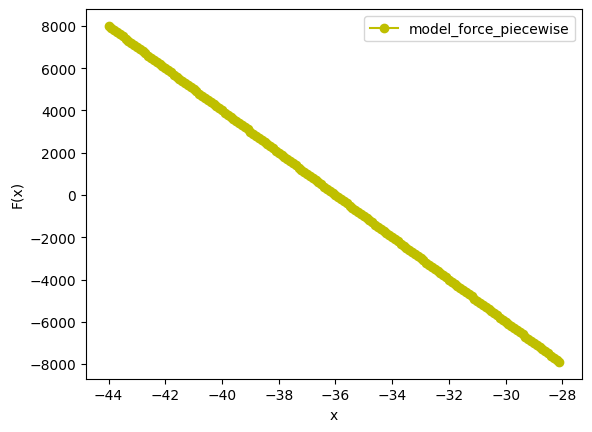

In [14]:
b1 = -34
b2 = -38
b=0
tf = TestFunctions(1000, b1, b2, 50, 0.1, opened_larger=True, opened_state=True)
X = np.arange(-10 + b1, 10 + b2, step = 0.1, dtype=np.float32)
# mfs = np.array( [ tf.model_force_square(x, b) for x in X])
# mfe = np.array( [ tf.model_force_e(x, b) for x in X])
# mfa = np.array( [ tf.model_force_asymetrical(x, b) for x in X])
# mfas = np.array( [ tf.model_force_a(x, b) for x in X])
# mfp = np.array( [ tf.model_force_piecewise(x, b) for x in X])
mfsm = np.array( [ tf.model_force_smooth(x, 50) for x in X])
# plt.plot(X, mfs, label="model_force_square")
# plt.plot(X, mfe, 'g--', label="model_force_e")
# plt.plot(X, mfa, 'r--', label="model_force_asymetrical")
# plt.plot(X, mfas, 'b--', label="model_force_asymetrical_first")
plt.plot(X, mfsm, 'yo-', label="model_force_piecewise")
plt.legend()
plt.xlabel("x")
plt.ylabel("F(x)")
plt.savefig("forces.png", bbox_inches="tight")
plt.show()

In [23]:
for m in mfp:
    print(m)

-10000.0
-9900.001525878906
-9800.003051757812
-9700.004577636719
-9600.006103515625
-9500.007629394531
-9400.009155273438
-9300.010681152344
-9200.01220703125
-9100.013732910156
-9000.015258789062
-8900.016784667969
-8800.018310546875
-8700.019836425781
-8600.021362304688
-8500.022888183594
-8400.0244140625
-8300.025939941406
-8200.027465820312
-8100.028991699219
-8000.030517578125
-7900.032043457031
-7800.0335693359375
-7700.035095214844
-7600.03662109375
-7500.038146972656
-7400.0396728515625
-7300.041198730469
-7200.042724609375
-7100.044250488281
-7000.0457763671875
-6900.047302246094
-6800.048828125
-6700.050354003906
-6600.0518798828125
-6500.053405761719
-6400.054931640625
-6300.056457519531
-6200.0579833984375
-6100.059509277344
-6000.06103515625
-5900.062561035156
-5800.0640869140625
-5700.065612792969
-5600.067138671875
-5500.068664550781
-5400.0701904296875
-5300.071716308594
-5200.0732421875
-5100.074768066406
-5000.0762939453125
-4900.077819824219
-4800.079345703125
-4700

In [28]:
import numpy as np
generator = np.random.Generator(np.random.PCG64(seed=12345))
generator.exponential(100)

18.4132567353775

starting transition at t= 19
-34.0 -38.0
x -34.0
b -41.6
-7600.000000000002
-34.0 -38.0
x -34.76
b -42.0
-7240.000000000002
-34.0 -38.0
x -35.483999999999995
b -42.4
-6916.000000000004
-34.0 -38.0
x -36.175599999999996
b -42.8
-6624.4000000000015
-34.0 -38.0
x -36.83803999999999
b -43.2
-6361.96000000001
-34.0 -38.0
x -37.47423599999999
b -43.6
-6125.764000000011
-34.0 -38.0
x -38.08681239999999
b -44.0
-5913.1876000000075
-34.0 -38.0
x -38.67813115999999
b -44.4
-5721.8688400000065
-34.0 -38.0
x -39.250318044
b -44.8
-5549.681956
-34.0 -38.0
x -39.805286239599994
b -45.2
-5394.713760400009
-34.0 -38.0
x -40.34475761563999
b -45.6
-5255.24238436001
ending transition at t= 29
starting transition at t= 39
-38.0 -34.0
x -39.11200599947394
b -22.4
16712.005999473946
-38.0 -34.0
x -37.440805399526546
b -22.0
15440.805399526545
-38.0 -34.0
x -35.896724859573894
b -21.6
14296.724859573893
-38.0 -34.0
x -34.467052373616504
b -21.2
13267.052373616505
-38.0 -34.0
x -33.14034713625485
b -20.8
123

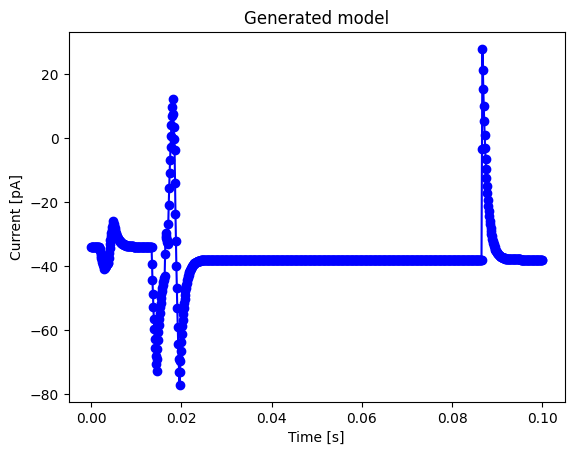

In [1]:
import ion_channel
import numpy as np
import matplotlib.pyplot as plt
ic = ion_channel.IonChannel(records=1000)
ic._generate_data()
fig, ax = plt.subplots()
ic.plot_time_series(ax)

In [ ]:
# -*- coding: utf-8 -*-
# Reference: https://en.wikipedia.org/wiki/Hurst_exponent
# python 3.6.2 AMD64
# 2018/4/19
# Calculate Hurst exponent based on Rescaled range (R/S) analysis
# How to use (example):
# import Hurst 
# data = list(range(50))
# hurst = Hurst.hurst(data)
# Tip: data has to be object list(n_samples,) or np.array(n_samples,)

__Author__ = "Ryan Wang"

import numpy as np
from ion_channel import IonChannel

def factor(liczba):
    products = []
    product = 2 # (*)
    while product*product <= liczba:
        while liczba % product == 0: # (****)
            # print(product, end=' ')
            products.append(product)
            liczba = liczba//product # (***)
        product += 1 # (**)
    if liczba > 1:
        print(liczba) # (*****)
    
    return np.array(products)[::-1]

def hurst(data):
    data = list(data)
    N = len(data)
    if N < 20:
        raise ValueError("Time series is too short! input series ought to have at least 20 samples!")

    len_of_subsets = np.cumprod(factor(N))[::-1]
    R_S_dict = []
    for k in len_of_subsets:
        R,S = 0, 0
        # split data into subsets
        subset_list = np.array([data[i:i+k] for i in range(0, N, k)])
        n = len(subset_list)
        # calc mean of every subset
        mean_list = np.array([np.mean(x) for x in subset_list])
        # calc cumsum of every subset
        for i in range(n):
            cumsum_list = np.cumsum(subset_list[i]-mean_list[i])
            R += max(cumsum_list) - min(cumsum_list)
            S += np.std(subset_list[i])
        R_S_dict.append({"R":R/len(subset_list),"S":S/len(subset_list),"n":k})
    
    log_R_S = []
    log_n = []
    print(R_S_dict)
    for i in range(len(R_S_dict)):
        R_S = (R_S_dict[i]["R"]+np.spacing(1)) / (R_S_dict[i]["S"]+np.spacing(1))
        log_R_S.append(np.log(R_S))
        log_n.append(np.log(R_S_dict[i]["n"]))
    
    Hurst_exponent = np.polynomial.Polynomial.fit(log_n,log_R_S,1).convert().coef[1]
    # Hurst_exponent = np.polyfit(log_n,log_R_S,1)[0]
    return Hurst_exponent
        
ic = IonChannel()
ic._generate_data()
print(hurst(ic.data_transposed[1][:50000]))


[{'R': 18872.023798274717, 'S': 1.6253228541404814, 'n': 50000}, {'R': 13426.633434569561, 'S': 1.5978390370809998, 'n': 25000}, {'R': 5040.413457681071, 'S': 1.3734113444209681, 'n': 12500}, {'R': 1871.2805040437513, 'S': 1.1737780458315312, 'n': 6250}, {'R': 974.0698795084237, 'S': 1.0724284709565381, 'n': 3125}, {'R': 116.31676707652078, 'S': 0.7637182796618193, 'n': 625}, {'R': 20.564269290165466, 'S': 0.5928868703871297, 'n': 125}, {'R': 4.084986107070858, 'S': 0.4515150852818497, 'n': 25}, {'R': 0.5317755568071547, 'S': 0.2554909443454217, 'n': 5}]
0.961645360968353


In [ ]:
def faktoryzacja(liczba):
    producti = []
    product = 2 # (*)
    while product*product <= liczba:
        while liczba % product == 0: # (****)
            print(product, end=' ')
            producti.append(product)
            liczba = liczba//product # (***)
        product += 1 # (**)
    if liczba > 1:
        print(liczba) # (*****)
    
    return np.array(producti)
# --------blok główny programu -----------

liczba = int(input())
np.cumprod(faktoryzacja(liczba))

2 2 2 2 5 5 5 5 5 

array([    2,     4,     8,    16,    80,   400,  2000, 10000, 50000])

In [1]:
import fathon
from fathon import fathonUtils as fu
fu.linRangeByStep(5, 50000, 5)

array([    5,    10,    15, ..., 49990, 49995, 50000])

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import fathon 
import fathon.fathonUtils as fu

def dfa(data):
    a = fu.toAggregated(data)
    pydfa = fathon.DFA(a)
    winSizes = np.arange(5, np.size(a) + 1, 5, dtype=np.int64)
    
    revSeg = True
    polOrd = 1

    n, F = pydfa.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
    max_limit = np.log(winSizes[-1])
    mid_point = winSizes[int(np.round(np.e**(max_limit//2), decimals=0))]
    limits_list = np.array([[winSizes[10], mid_point], [mid_point, winSizes[-1]], [winSizes[10], winSizes[-1]]], dtype=int)
    list_alpha, list_alpha_intercept = pydfa.multiFitFlucVec(limits_list)

    return n, F, list_alpha, list_alpha_intercept, limits_list

def plot_autocorrelation_dfa(data, fig, ax, stationarity=False):
    """
    Calculates, shows and saves Detrended Fluctuation Analysis plots with Hurst exponent for autocorrelation. 
    Depending on the value of H it is:
    * alpha < 0.5 - anti-correlated
    * alpha around 0.5 - uncorrelated, white noise
    * alpha > 0.5 - correlated
    * alpha around 1 - 1/f-noise, pink noise
    * alpha > 1 - non-stationary, unbounded
    * alpha around 1.5 - Brownian noise
    ----------    

    Parameters
    ----------
    data : ndarray
        1D array containing data to calculate autocorrelation on.
    fig : matplotlib.pyplot.Figure
        Figure on which autocorrelation is plotted.
    ax : matplotlib.pyplot.Axes
        Subplot ax to put plot into.

    Examples:
    ---------
    >>> import numpy as np
    >>> from ion_channel import IonChannel
    >>> ic = IonChannel()
    >>> data = np.random.random(10000)
    >>> ic.plot_autocorrelation_dfa(data)
    """
    if stationarity:
        # check if time series is stationary
        stationary = False
        result = adfuller(data)
        if result[1] > 0.05:
            stationary = True
    
    n, F, list_alpha, list_alpha_intercept, limits_list = dfa(data)

    clrs = ['k', 'b', 'm', 'c', 'y']
    stls = ['-', '--', '.-']
    ax.plot(np.log(n), np.log(F), 'ro')
    for i in range(len(list_alpha)):
        n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1)
        ax.plot(np.log(n_rng), list_alpha_intercept[i]+list_alpha[i]*np.log(n_rng),
                clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label=(r'$\alpha$' + ' = {:.2f}'.format(list_alpha[i])))
    ax.set_xlabel('ln(n)', fontsize=14)
    ax.set_ylabel('ln(F(n))', fontsize=14)
    ax.set_title(('Stationary' if stationary else 'Non-stationary ') if stationarity else ('') + 'DFA' , fontsize=14)
    ax.legend(loc=0, fontsize=14)
    return fig, ax

def gpu_dfa(data):
    data = np.array(data)
    # zagregowanie danych tak, że jest to kumulatwyna suma różnicy między wartościami a średnią
    mean = np.mean(data)
    a = np.cumsum(data - mean)
    N = len(a)
    print(N)
    winSizes = np.arange(5, np.size(a) + 1, 5, dtype=np.int64)
    polOrd = 3
    
    F = np.array([])
    for n in winSizes:
        # print(f"n = {n}")
        # podziel a na sekwencje o długości n
        idx = (N // n) * n
        # print(idx)
        split_n = np.array(np.array_split(a[:idx], n)) # lista ndarrayów
        # print(split_n.shape)
        # oblicz lokalny trend dla split_n
        Y = []
        for x in split_n:
            X = np.arange(len(x))
            A = A = np.vstack([X, np.ones(len(X))]).T
            m, c = np.linalg.lstsq(A, x, rcond=None)[0]
            Y.append(np.polyval([m, c], X)) # wszystkie linie dopasowane do poszczególnych segmentów o długości n
            # _ = plt.plot(np.arange(len(split_n)), split_n, 'o')
            # _ = plt.plot(x, m*x + c, 'r')
        Y = np.array(Y)
        # print(Y.shape)
        F_i = np.sqrt(np.mean((X - Y)**2, axis=1))
        # print(f"F_i.shape = {F_i.shape}")
        F = np.append(F, np.sqrt(1/(N/n)*np.sum(np.square(F_i))))
        # print(np.log(n), np.log(F))

    max_limit = np.log(winSizes[-1])
    mid_point = winSizes[int(np.round(np.e**(max_limit//2), decimals=0))]
    limits_list = np.array([[winSizes[0], mid_point], [mid_point, winSizes[-1]], [winSizes[0], winSizes[-1]]], dtype=int)
    clrs = ['r', 'g', 'b']
    plt.scatter(np.log(winSizes), np.log(F), color='y')
    for i, ll in enumerate(limits_list):
        c, m = np.polynomial.Polynomial.fit(np.log(winSizes)[ll[0]:ll[1]], np.log(F)[ll[0]:ll[1]], 1).convert().coef
        xs = np.log(winSizes)[ll[0]:ll[1]]
        plt.plot(xs, c + m * xs, label=(r'$\alpha$' + ' = {:.2f}'.format(m)), color=clrs[i])
    plt.legend(loc=0, fontsize=14)
    plt.title("DFA")
    plt.xlabel("log(n)")
    plt.ylabel("log(F(n))")

a = np.random.random(50000)
gpu_dfa(a)
# fig, ax = plt.subplots()
# plot_autocorrelation_dfa(a, fig, ax)


50000


KeyboardInterrupt: 

In [96]:
import numpy as np
winSizes = np.arange(5, np.size(a) + 1, 5, dtype=np.int64)
winSizes
(1000//5)*5

1000

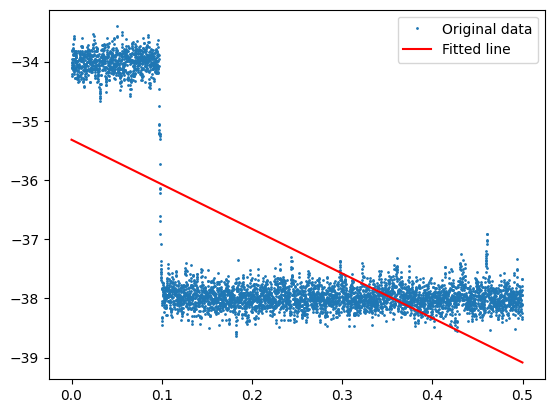

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ion_channel
ic = ion_channel.IonChannel(records=5000)
ic._generate_data()
a = ic.data_transposed[1]
x = ic.data_transposed[0]
A = A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, a, rcond=None)[0]
_ = plt.plot(x, a, 'o', label='Original data', markersize=1)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()
plt.show()


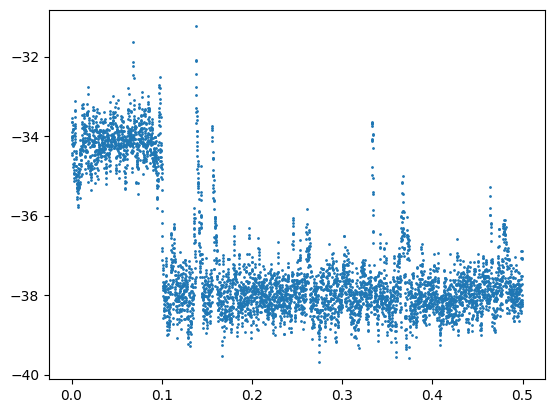

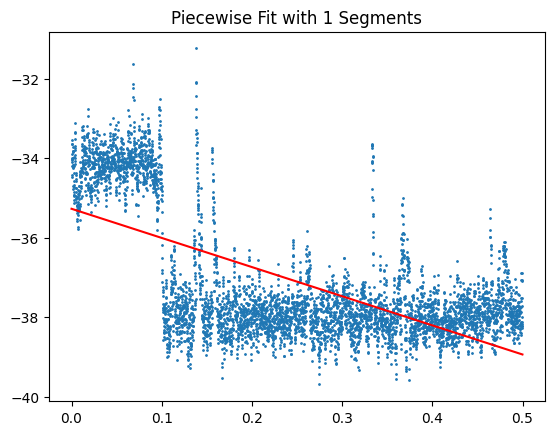

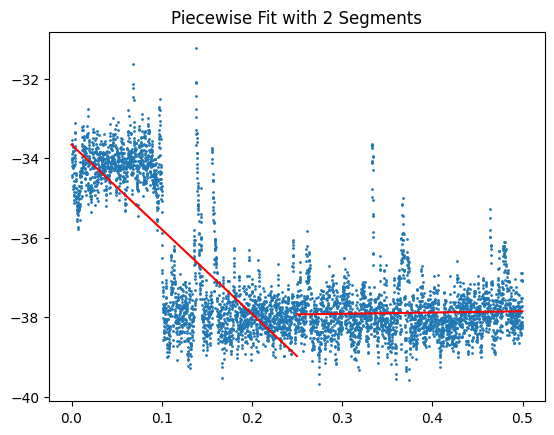

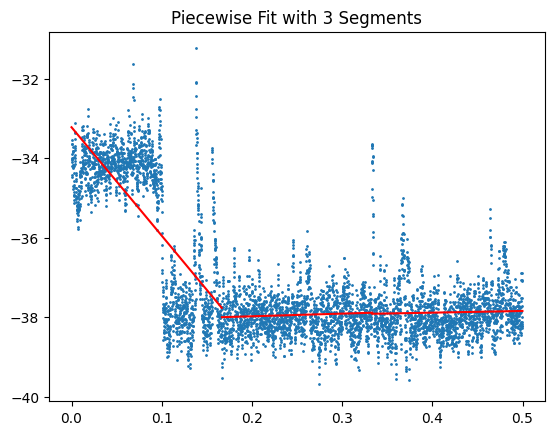

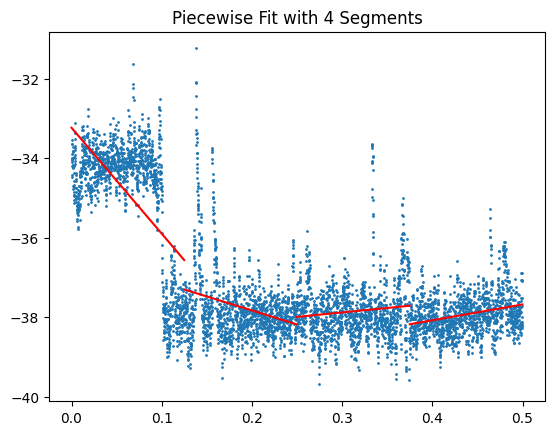

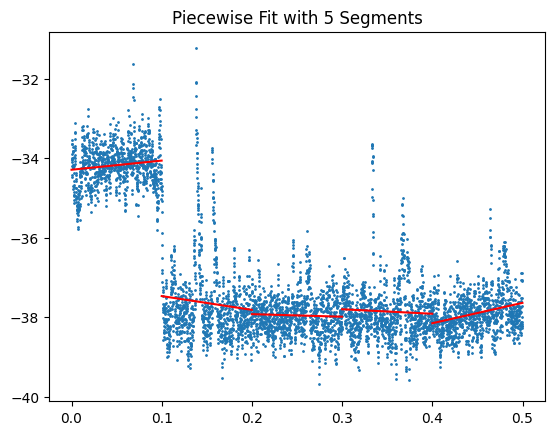

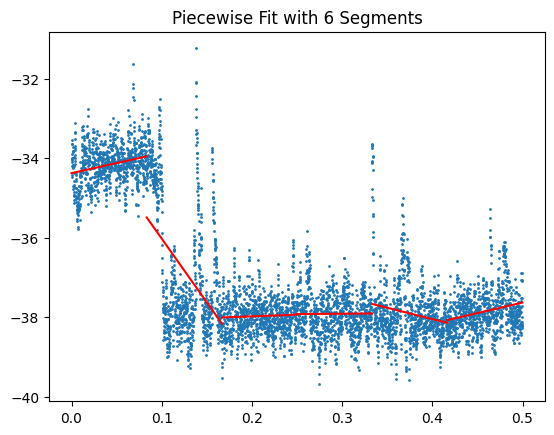

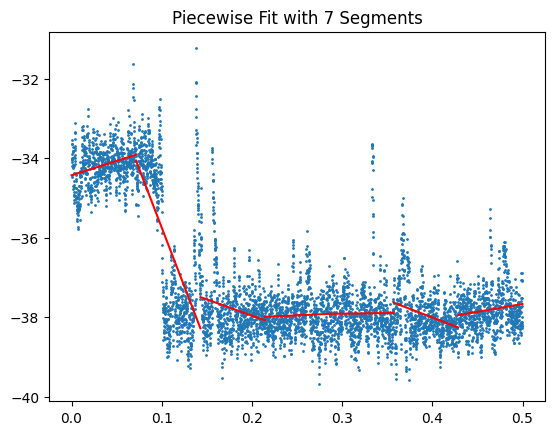

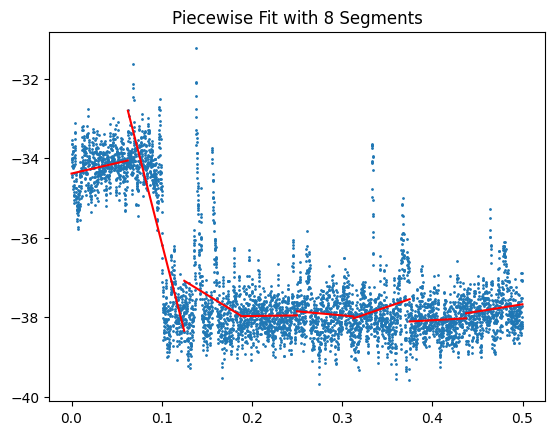

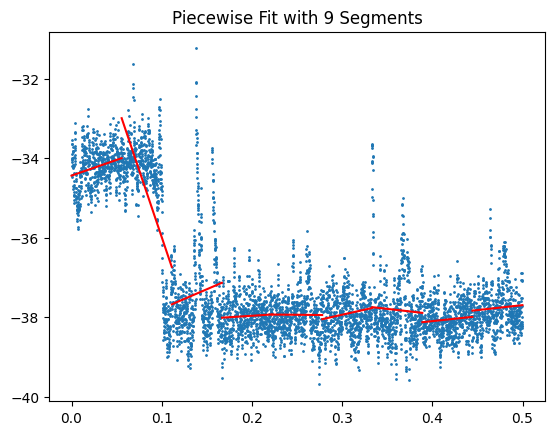

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ion_channel import IonChannel

# Create an instance of IonChannel and generate data
ic = IonChannel(records=5000)
ic._generate_data(random_force='Levy')

# Extract data
x = ic.data_transposed[0]
a = ic.data_transposed[1]

# Plot the original data
plt.plot(x, a, 'o', label='Original data', markersize=1)

# Define segment lengths
segments_lengths = np.arange(1, 10, 1, dtype=np.int64)

# Fit and plot piecewise polynomials for each segment length
for n in segments_lengths:
    X_segments = np.array_split(x, n)
    A_segments = np.array_split(a, n)
    
    plt.figure()
    plt.plot(x, a, 'o', label='Original data', markersize=1)
    
    for i, x_i in enumerate(X_segments):
        try:
            # Fit a second degree polynomial to the data
            coefficients = np.polynomial.Polynomial.fit(x_i, A_segments[i], 1).convert().coef[::-1]
            polynomial = np.poly1d(coefficients)
            plt.plot(x_i, polynomial(x_i), 'r', label=f'Fitted polynomial segment {i}')
        except Exception as e:
            print(f"Segment {i} fitting error: {e}")
            continue
    
    # plt.legend()
    plt.title(f'Piecewise Fit with {n} Segments')
    plt.show()